In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import matplotlib.pyplot as plt
import re
import nltk
#nltk.download('stopwords')
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import Word
from nltk.util import ngrams
import re
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords 


Load 1 year worth of data and create a dataframe that will hold all data. The data is currently organized in chunks.

In [2]:
#list of each directory containing data
data_dirs = ['apr2018', 'may2018', 'jul2018', 'aug2018', 'sep2018', 'oct2018', 'nov2018', 'dec2018', 'jan2019', 'feb2019', 'mar2019']
#declare a dictionary of data frames that will hold each month's data
data_frames = {}

Load each months individually and from this create a single dataframe that contains everything. __Attention__ the data collected in 2019 has more attributes than the data collected in 2018. We have to make sure that the attributes match.

In [3]:
for grp in data_dirs:
    file_name = '../data/' + grp + '/listings.csv.gz'
    data_frames[grp] = pd.read_csv(file_name, low_memory=False, compression='gzip')
    
cols_2108 = list(data_frames['apr2018'].columns)
cols_2019 = list(data_frames['feb2019'].columns)

diff_list = list(set(cols_2019) - set(cols_2108))

#print the additional attributes that are present in 2019 but not present in 2018
print(diff_list)

['maximum_nights_avg_ntm', 'maximum_minimum_nights', 'calculated_host_listings_count_private_rooms', 'minimum_nights_avg_ntm', 'minimum_maximum_nights', 'maximum_maximum_nights', 'calculated_host_listings_count_entire_homes', 'minimum_minimum_nights', 'calculated_host_listings_count_shared_rooms', 'number_of_reviews_ltm']


Let's drop the additional attributes. We're missing them for 2018 anyway. We are going to 

In [4]:
dataframes_list = []
for frame in data_frames:
    
    dataframes_list.append(data_frames[frame])
    
master_df = pd.concat(dataframes_list, axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True, sort=False)

data_frames.clear()
dataframes_list.clear()

#master_df.drop(labels=diff_list, axis=1)

print(master_df.columns.values)
print(len(master_df.columns.values))

['id' 'listing_url' 'scrape_id' 'last_scraped' 'name' 'summary' 'space'
 'description' 'experiences_offered' 'neighborhood_overview' 'notes'
 'transit' 'access' 'interaction' 'house_rules' 'thumbnail_url'
 'medium_url' 'picture_url' 'xl_picture_url' 'host_id' 'host_url'
 'host_name' 'host_since' 'host_location' 'host_about'
 'host_response_time' 'host_response_rate' 'host_acceptance_rate'
 'host_is_superhost' 'host_thumbnail_url' 'host_picture_url'
 'host_neighbourhood' 'host_listings_count' 'host_total_listings_count'
 'host_verifications' 'host_has_profile_pic' 'host_identity_verified'
 'street' 'neighbourhood' 'neighbourhood_cleansed'
 'neighbourhood_group_cleansed' 'city' 'state' 'zipcode' 'market'
 'smart_location' 'country_code' 'country' 'latitude' 'longitude'
 'is_location_exact' 'property_type' 'room_type' 'accommodates'
 'bathrooms' 'bedrooms' 'beds' 'bed_type' 'amenities' 'square_feet'
 'price' 'weekly_price' 'monthly_price' 'security_deposit' 'cleaning_fee'
 'guests_include

As we can notice above we have a total of 106 attributes. Some of these will be completely useless for the pourpose of our project. We decided to drop quite a number of attributes and keep only those we are going to focus on.

In [5]:
diff_list.append('listing_url')
diff_list.append('scrape_id')
diff_list.append('last_scraped')
diff_list.append('space')
diff_list.append('experiences_offered')
diff_list.append('neighborhood_overview')
diff_list.append('notes')
diff_list.append('transit')
diff_list.append('access')
diff_list.append('interaction')
diff_list.append('house_rules')
diff_list.append('thumbnail_url')
diff_list.append('medium_url')
diff_list.append('picture_url')
diff_list.append('xl_picture_url')
diff_list.append('host_url')
diff_list.append('host_about')
diff_list.append('host_response_time')
diff_list.append('host_response_rate')
diff_list.append('host_acceptance_rate')
diff_list.append('host_thumbnail_url')
diff_list.append('host_picture_url')
diff_list.append('host_neighbourhood')
diff_list.append('host_verifications')
diff_list.append('host_has_profile_pic')
diff_list.append('market')
diff_list.append('smart_location')
diff_list.append('country_code')
diff_list.append('country')
diff_list.append('square_feet')
diff_list.append('weekly_price')
diff_list.append('monthly_price')
diff_list.append('security_deposit')
diff_list.append('cleaning_fee')
diff_list.append('minimum_nights')
diff_list.append('maximum_nights')
diff_list.append('calendar_updated')
diff_list.append('has_availability')
diff_list.append('availability_30')
diff_list.append('availability_60')
diff_list.append('availability_90')
diff_list.append('calendar_last_scraped')
diff_list.append('number_of_reviews')
diff_list.append('first_review')
diff_list.append('last_review')
diff_list.append('review_scores_rating')
diff_list.append('review_scores_accuracy')
diff_list.append( 'review_scores_cleanliness')
diff_list.append('review_scores_checkin')
diff_list.append('review_scores_communication')
diff_list.append('review_scores_location')
diff_list.append('review_scores_value')
diff_list.append('requires_license')
diff_list.append('license')
diff_list.append('jurisdiction_names')
diff_list.append('instant_bookable')
diff_list.append('is_business_travel_ready')
diff_list.append('cancellation_policy')
diff_list.append('require_guest_profile_picture')
diff_list.append('require_guest_phone_verification')
diff_list.append('calculated_host_listings_count') 
diff_list.append('reviews_per_month')
diff_list.append('neighbourhood_group_cleansed')
diff_list.append('zipcode')
diff_list.append('city')
diff_list.append('state')

master_df.drop(diff_list, axis=1, inplace=True)

print(master_df.columns.values)


['id' 'name' 'summary' 'description' 'host_id' 'host_name' 'host_since'
 'host_location' 'host_is_superhost' 'host_listings_count'
 'host_total_listings_count' 'host_identity_verified' 'street'
 'neighbourhood' 'neighbourhood_cleansed' 'latitude' 'longitude'
 'is_location_exact' 'property_type' 'room_type' 'accommodates'
 'bathrooms' 'bedrooms' 'beds' 'bed_type' 'amenities' 'price'
 'guests_included' 'extra_people' 'availability_365']


This is a lot more manageable. First attribute we are going to focus on is price. Before we can do this we should fill in N/A's, handle our categorical values as well as try to extract meaning from summary, description and maybe also look into amenities and listing's name. The idea behind is try to find maybe similar writing styles. Let's check the head of our dataframe first.

In [6]:
print(master_df.head().T)

                                                                           0  \
id                                                                  24084526   
name                       Large sunny room with queen sized bed &near su...   
summary                    Private room: luxury queen sized bed.  Located...   
description                Private room: luxury queen sized bed.  Located...   
host_id                                                            157408457   
host_name                                                      Lisa & Benson   
host_since                                                        2017-11-04   
host_location                                                             CA   
host_is_superhost                                                          f   
host_listings_count                                                        7   
host_total_listings_count                                                  7   
host_identity_verified                  

First we will have to remove the __$__ symbol from the price column and convert it to float

In [7]:
master_df['price']=master_df['price'].str.replace('[$,]','',regex=True).astype(float)
master_df['extra_people']=master_df['extra_people'].str.replace('[$,]','',regex=True).astype(float)

Now we will check the percentage of NA's for each field

In [8]:
print((len(master_df)-master_df.count())/len(master_df)*100)

id                           0.000000
name                         0.003529
summary                      2.870263
description                  1.241059
host_id                      0.000000
host_name                    0.083678
host_since                   0.083678
host_location                0.136607
host_is_superhost            0.083678
host_listings_count          0.083678
host_total_listings_count    0.083678
host_identity_verified       0.083678
street                       0.000000
neighbourhood                3.921282
neighbourhood_cleansed       0.000000
latitude                     0.000000
longitude                    0.000000
is_location_exact            0.000000
property_type                0.000000
room_type                    0.000000
accommodates                 0.000000
bathrooms                    0.079646
bedrooms                     0.039319
beds                         0.107874
bed_type                     0.000000
amenities                    0.000000
price       

As we can see below we have very few NA's, yet we should fill them in anyway. The following step is going to take care of this and also of some categorical values.

In [9]:
master_df['name']=master_df['name'].fillna(' ')
master_df['summary']=master_df['summary'].fillna(' ')
master_df['description']=master_df['description'].fillna(' ')
master_df['host_name']=master_df['host_name'].fillna(' ')
master_df['host_since']=master_df['host_since'].fillna('0')
master_df['host_location']=master_df['host_location'].fillna(' ')
# if superhost is missing (6 records) I assume that they are not + change to boolean 0,1
master_df['host_is_superhost']=master_df['host_is_superhost'].fillna('f').map({'f':0,'t':1})
master_df['host_listings_count']=master_df['host_listings_count'].fillna(1)
master_df['host_total_listings_count']=master_df['host_total_listings_count'].fillna(1)
master_df['host_identity_verified']=master_df['host_identity_verified'].fillna('f').map({'f':0,'t':1})
master_df['neighbourhood']=master_df['neighbourhood'].fillna(' ')
master_df['bathrooms']=master_df['bathrooms'].fillna(0)
master_df['bedrooms']=master_df['bedrooms'].fillna(0)
master_df['beds']=master_df['beds'].fillna(1)
master_df['is_location_exact']=master_df['is_location_exact'].fillna('f').map({'f':0,'t':1})

First step. We are going to cleanup the text and lemmatize it. For this we have defined a function that will do just that.

In [10]:
def ProcessTextData(sentence):
    text_data = sentence
    text_data = text_data.lower()
    #removes unicode strings
    text_data = re.sub(r'(\\u[0-9A-Fa-f])', r'', text_data)
    text_data = re.sub(r'[^\x00-\x7f]', r'', text_data)
    #convert any url to URL
    text_data = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', text_data)
    #convert any @user to AT_USER
    text_data = re.sub('@[^\s]+', 'AT_USER', text_data)
    #remove additional white spaces
    text_data = re.sub('[\s]+', ' ', text_data)
    text_data = re.sub('[\n]+', ' ', text_data)
    #remove not alphanumeric symbols white spaces
    text_data = re.sub(r'[^\w]+', ' ', text_data)
    #remove numbers
    text_data = ''.join([i for i in text_data if not i.isdigit()])
    
    lemmatizer = WordNetLemmatizer()
    
    word_list = nltk.word_tokenize(text_data)
    
    stop_words = set(stopwords.words('english')) 
    
    filtered_sentence = [w for w in word_list if not w in stop_words]
    
# Lemmatize list of words and join
    text_data = ' '.join([lemmatizer.lemmatize(w) for w in filtered_sentence])

#    text_data = " ".join([Word(word).lemmatize for word in text_data.split()])
    #stemmer
#    st = PorterStemmer()
#   text_data = " ".join([st.stem(word) for word in text_data.split()])
    
    sentence = text_data
    return sentence


In [11]:
master_df['name'] = master_df['name'].apply(ProcessTextData)
master_df['summary'] = master_df['summary'].apply(ProcessTextData)
master_df['description'] = master_df['description'].apply(ProcessTextData)
master_df['amenities'] = master_df['amenities'].apply(ProcessTextData)

Now we are going to try and run topic modelling on summary and descriptions fields. Hoepfullt this will enhance the features. We are going to use Latent Semantic Analysis for topic extraction.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.decomposition import TruncatedSVD 


vectorizer_summary = TfidfVectorizer(stop_words='english', max_features= 500, max_df = 0.5, smooth_idf=True)
vectorizer_description = TfidfVectorizer(stop_words='english', max_features= 500, max_df = 0.5, smooth_idf=True)

X_summary = vectorizer_summary.fit_transform(master_df['summary'])
X_description = vectorizer_description.fit_transform(master_df['description'])

X_summary.shape
#X_description.shape


(198379, 500)

In [13]:
# SVD represent documents and terms in vectors 
svd_model_summary = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122) 
svd_model_description = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122) 

svd_model_summary.fit(X_summary) 
svd_model_description.fit(X_description) 

len(svd_model_summary.components_)

20

Now we should try and find out what topics our SVD models have managed to find.

In [14]:
terms_summary = vectorizer_summary.get_feature_names() 
all_summary_topics = []
for i, comp in enumerate(svd_model_summary.components_):
    text_data = ''
    terms_comp_summary = zip(terms_summary, comp) 
    sorted_terms_summary = sorted(terms_comp_summary, key= lambda x:x[1], reverse=True)[:10] 
#    all_summary_topics.append(sorted_terms_summary)
    text_data = ' '.join([t[0] for t in sorted_terms_summary])
    all_summary_topics.append(text_data)
    
    print("Topic Summary "+str(i)+": " + text_data) 
#    print(sorted_terms_summary) 


Topic Summary 0: toronto minute bedroom walk downtown room place subway min located
Topic Summary 1: place good solo adventurer business couple traveller youll love centre
Topic Summary 2: centre tower cn rogers district condo canada toronto union entertainment
Topic Summary 3: min minute walk subway bus station restaurant store park drive
Topic Summary 4: west home neighbourhood toronto city apartment park street heart best
Topic Summary 5: min queen west walk king bed view building st high
Topic Summary 6: queen west room centre street bed st minute king private
Topic Summary 7: minute subway building condo store yonge gym apartment bedroom grocery
Topic Summary 8: minute walk home family floor beach away drive large ceiling
Topic Summary 9: centre park walking high parking distance store fully grocery free
Topic Summary 10: apartment fully furnished bedroom basement yonge subway centre toronto equipped
Topic Summary 11: floor apartment ceiling view window house bedroom bright park g

In [15]:
terms_description = vectorizer_description.get_feature_names() 
all_description_topics = []
for i, comp in enumerate(svd_model_description.components_):
    text_data = ''
    terms_comp_description = zip(terms_description, comp) 
    sorted_terms_description = sorted(terms_comp_description, key= lambda x:x[1], reverse=True)[:10] 
#    all_description_topics.append(sorted_terms_description)
    text_data = ' '.join([t[0] for t in sorted_terms_description])
    all_description_topics.append(text_data)
    
    print("Topic Description "+str(i)+": " + text_data) 


Topic Description 0: room minute walk apartment bed subway min downtown place guest
Topic Description 1: centre condo tower cn rogers district view union canada entertainment
Topic Description 2: place close good adventurer min solo youll minute love station
Topic Description 3: place solo good adventurer business couple youll love traveller bed
Topic Description 4: west apartment street restaurant neighbourhood great shop bar park city
Topic Description 5: apartment min fully subway tv equipped bed furnished high yonge
Topic Description 6: min queen west king walk home loft floor street bed
Topic Description 7: apartment centre rogers basement tower cn canada bed air union
Topic Description 8: room apartment west building living shared queen st gym balcony
Topic Description 9: apartment min guest stay access available building need space check
Topic Description 10: west queen street guest available parking king walking distance free
Topic Description 11: yonge subway home university y

We've listed above the main topics that occur in listings descriptions and summaries. At this point we should, probably, try to understand our data a biut better. Let's check some data types and decide if we need anymore transformations before we are going to start visualizing features.

In [16]:
master_df.head().T

,0,1,2,3,4
id,24084526,23663025,23843646,23187462,23905923
name,large sunny room queen sized bed near subway,room york university subway around,north york private basement room,room york university subway around,room york university subway around
summary,private room luxury queen sized bed located qu...,bright room york university subway store resta...,place great professor student walking distance...,room york university subway store restaurant a...,room york university subway store restaurant a...
description,private room luxury queen sized bed located qu...,bright room york university subway store resta...,place great professor student walking distance...,room york university subway store restaurant a...,room york university subway store restaurant a...
host_id,157408457,43488381,126037968,43488381,43488381
host_name,Lisa & Benson,Runying,Lisa,Runying,Runying
host_since,2017-11-04,2015-09-06,2017-04-15,2015-09-06,2015-09-06
host_location,CA,CA,"Great Neck, New York, United States",CA,CA
host_is_superhost,0,0,0,0,0
host_listings_count,7,33,7,33,33


In [17]:
#sns.swarmplot(y=master_df['price'])

Let's check the price variation based on neighborhood, property type, bed type, amenities. We shoudl also plot a heatmap of prices, bathrooms, bedrooms in the hpe that we are going to be able to detect some anomalies.

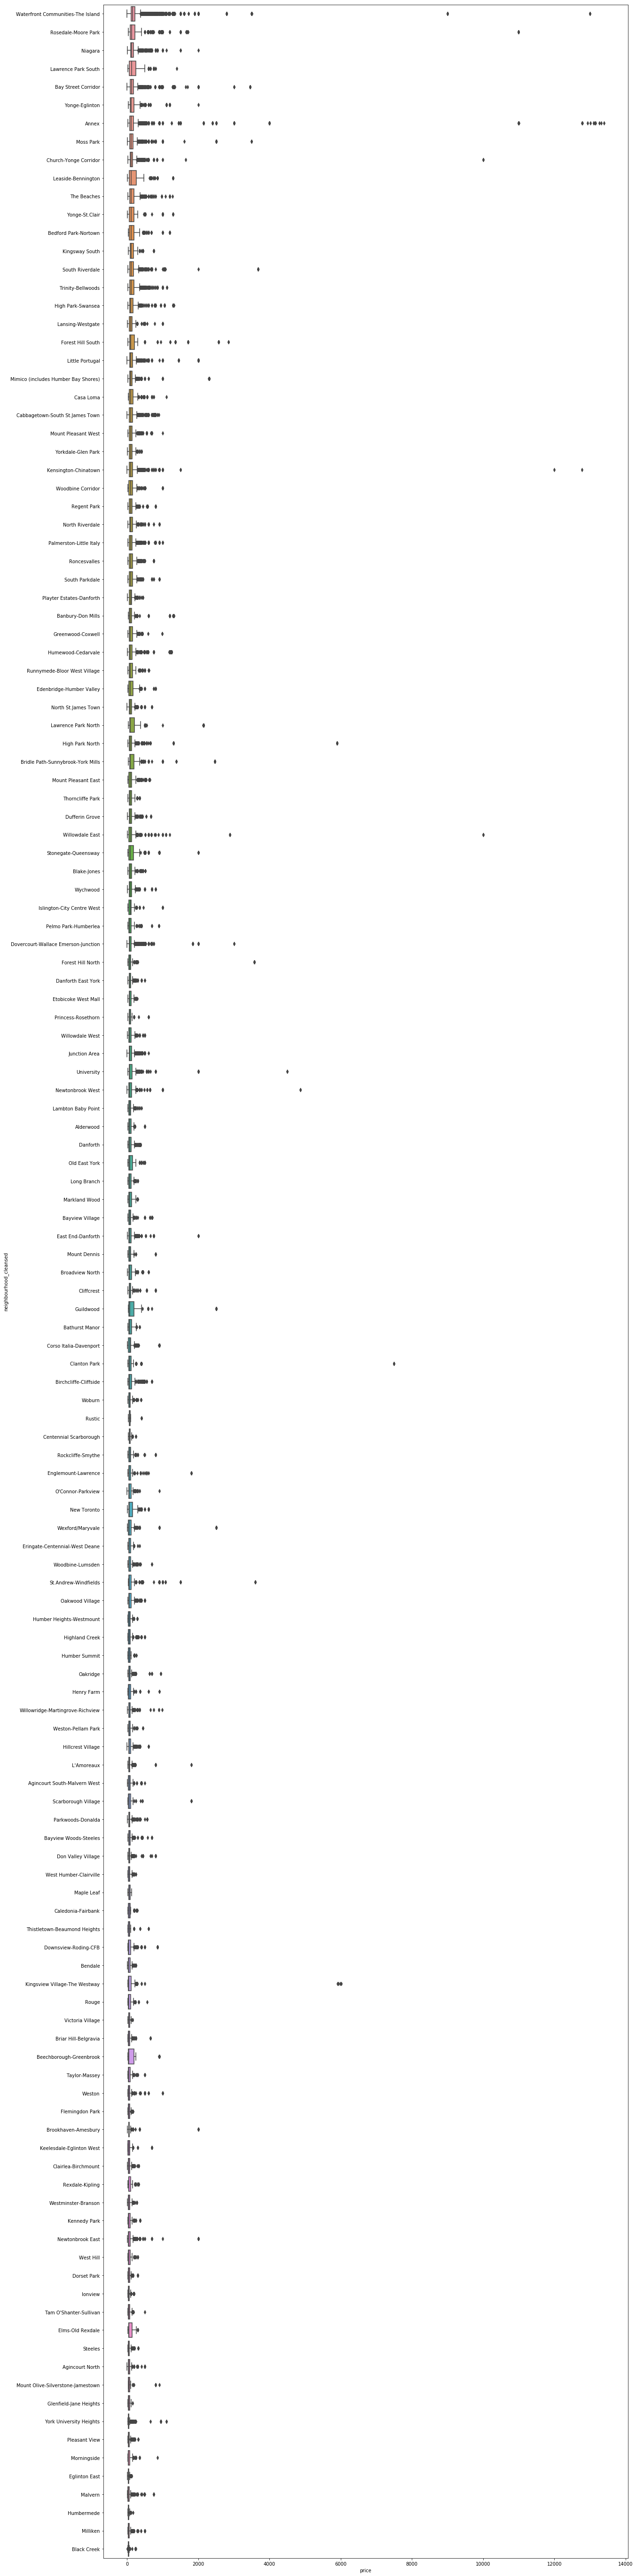

In [18]:
import matplotlib.ticker as ticker
sort_order = master_df.groupby('neighbourhood_cleansed')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index

plt.figure(figsize=(20,100))
#plt.rcParams['figure.dpi'] = 200
#sns.set_context("poster")
sns.boxplot(x='price', y='neighbourhood_cleansed', data=master_df, order=sort_order)

#ax = plt.gca()
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

#ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
#ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
                             
plt.show()

Hmm.. why we have so many outliers in The Annex and Kensigton market?

Hmm.. why we have so many outliers in The Annex and Kensigton market

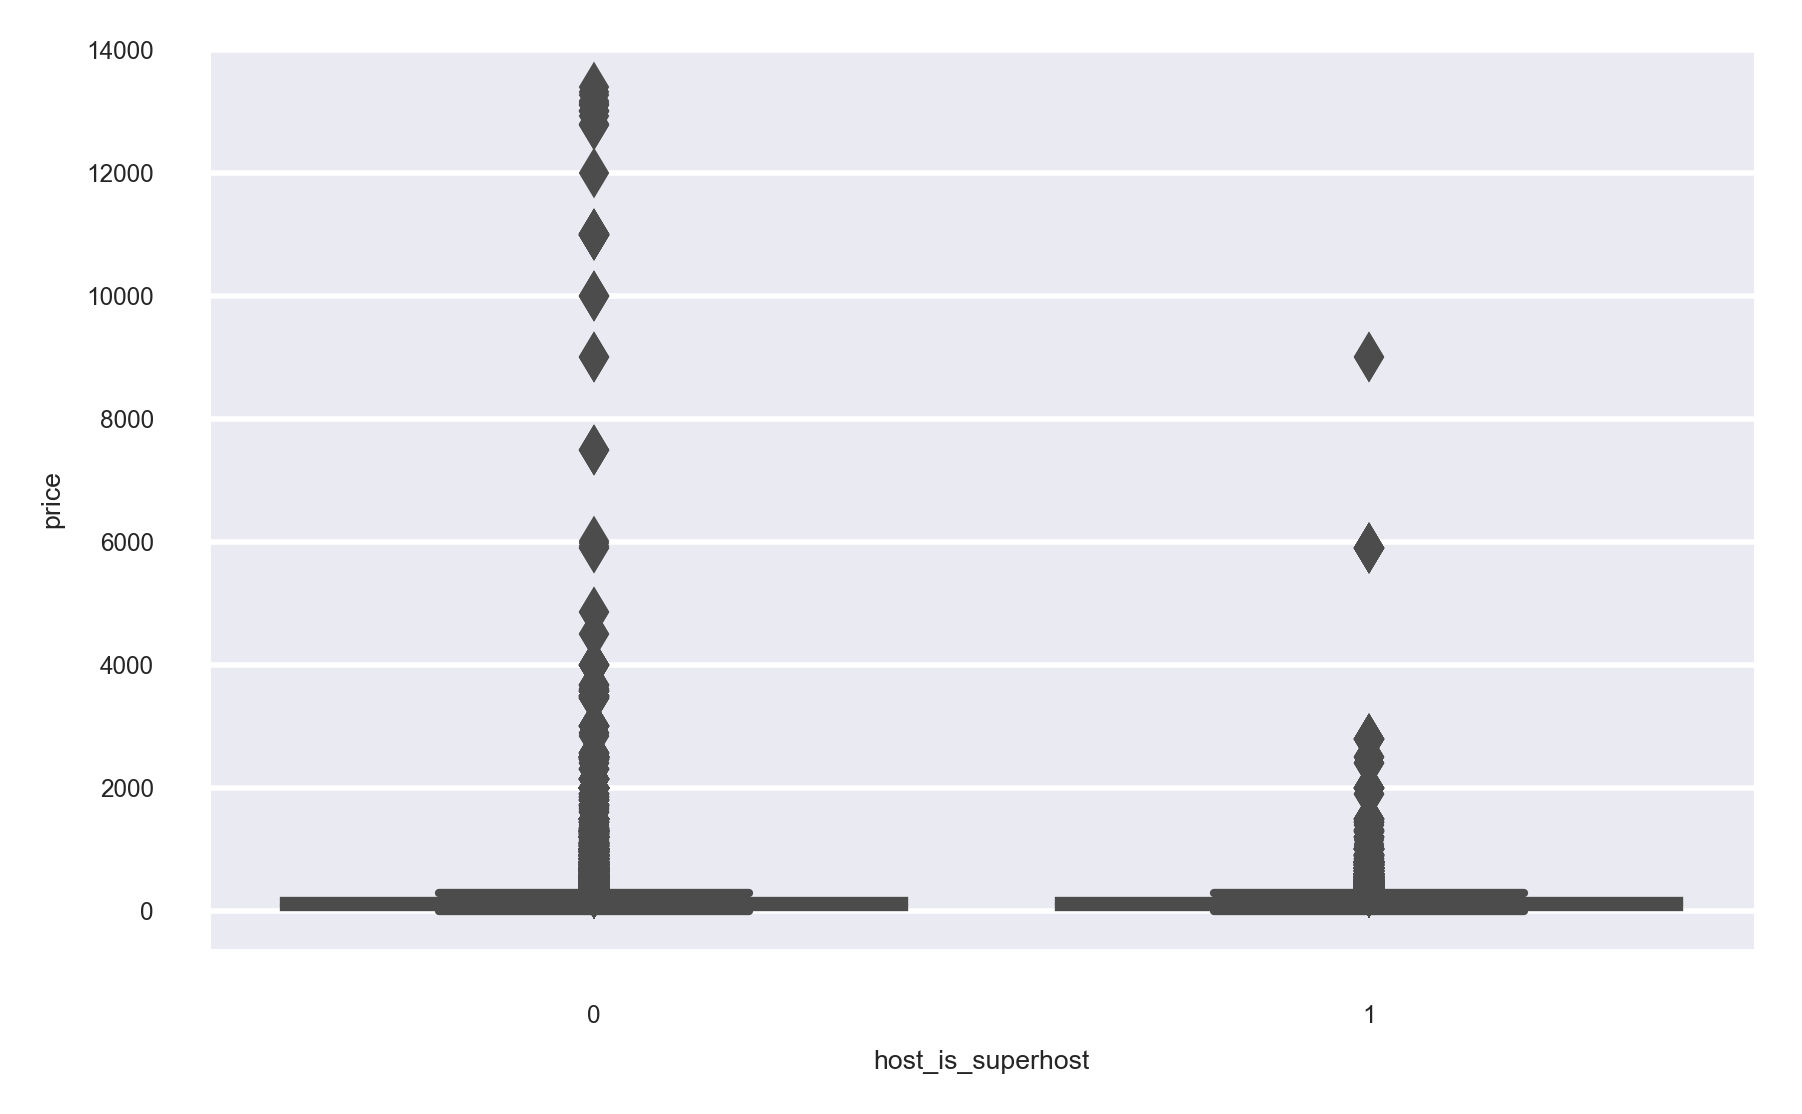

In [20]:
#plt.figure(figsize=(7.5, 4))
plt.rcParams['figure.dpi'] = 400
plt.figure(figsize=(5,3))
plt.rcParams.update({'font.size': 5})
sns.set(font_scale=0.4)
sns.boxplot(y='price', x='host_is_superhost', data=master_df)

Obviously if host is not superhost seems to generate a lot more outliers.

In [21]:
sort_order = master_df.groupby('property_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
plt.figure(figsize=(20,100))
sns.boxplot(x='price', y='property_type', data=master_df, order=sort_order)
#ax = plt.gca()
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

Looks like condominiums are something we should keep an eye a bit more.

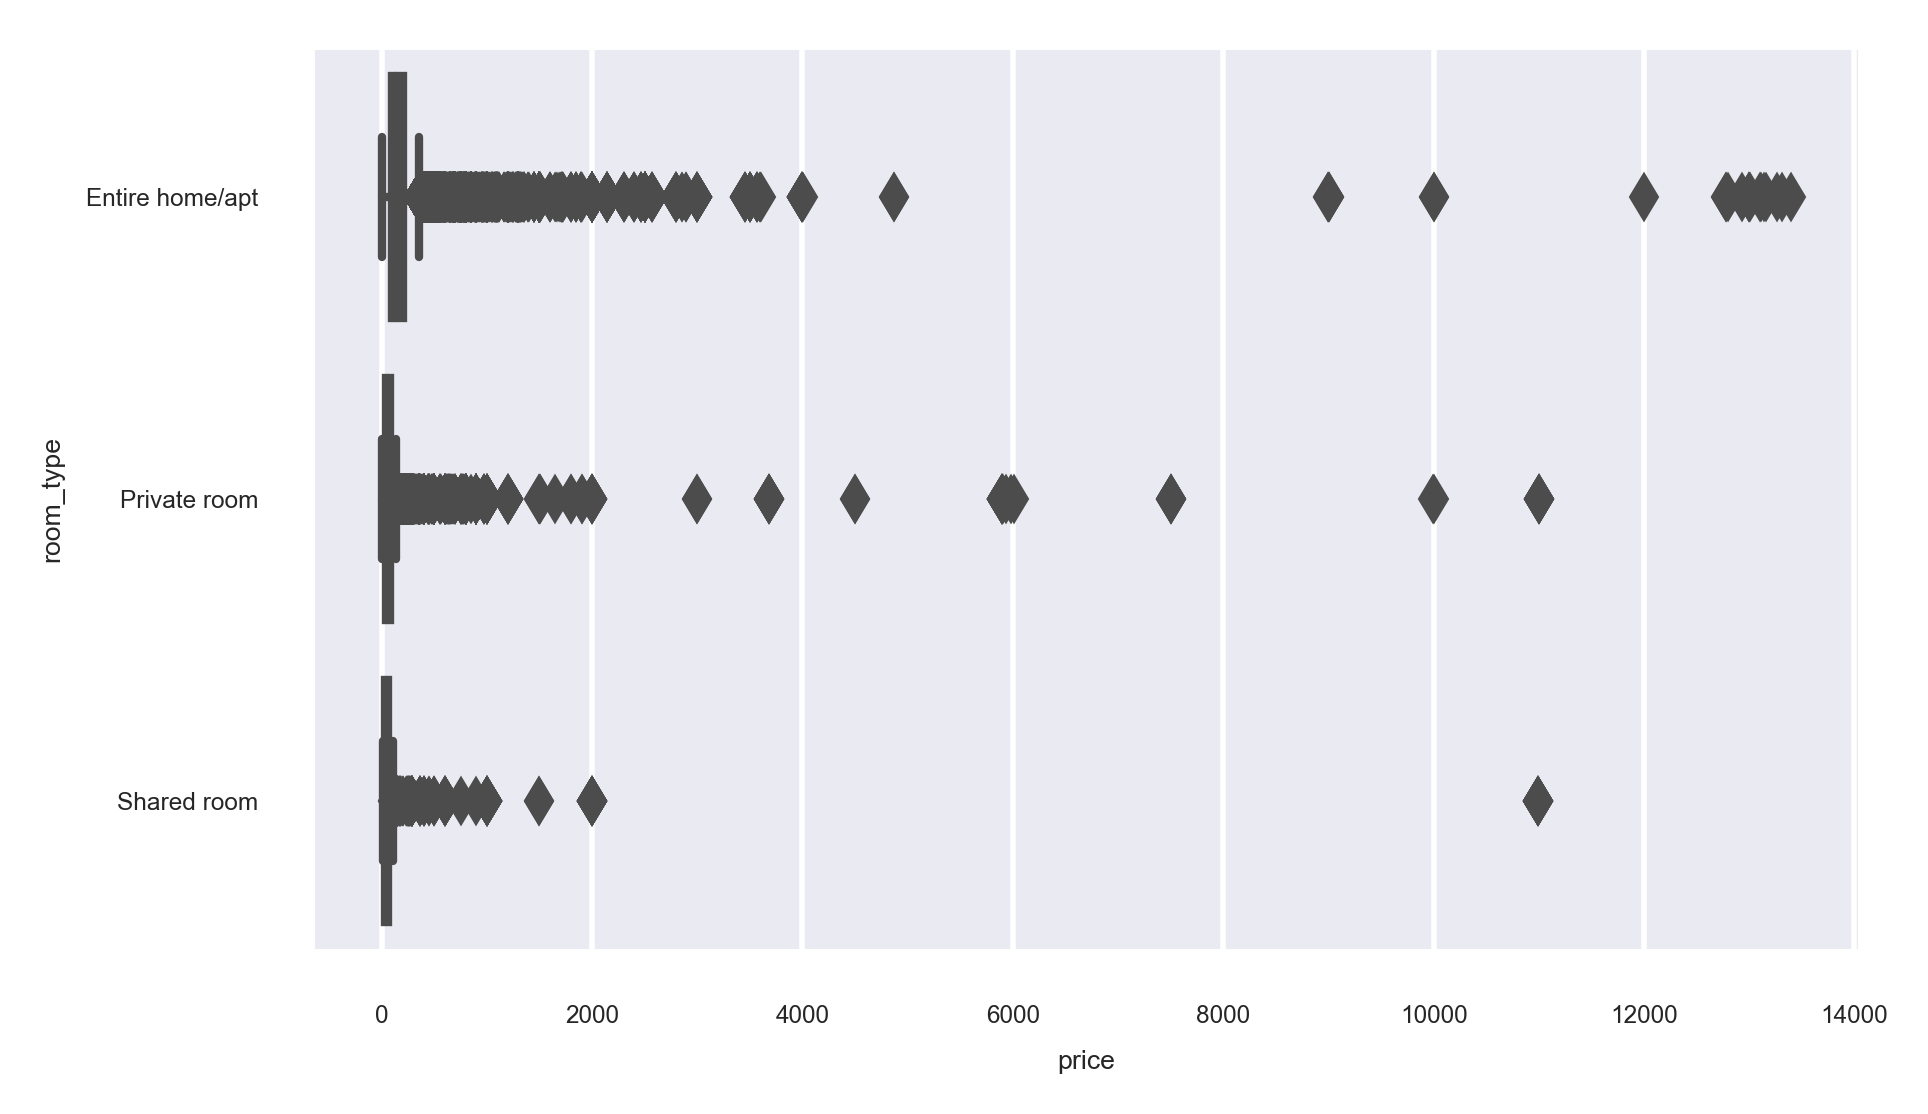

In [22]:
sort_order = master_df.groupby('room_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index

plt.figure(figsize=(5,3))
plt.rcParams.update({'font.size': 5})
sns.set(font_scale=0.4)

sns.boxplot(x='price', y='room_type', data=master_df, order=sort_order)

Why we see shared rooms/private rooms having such a high price?

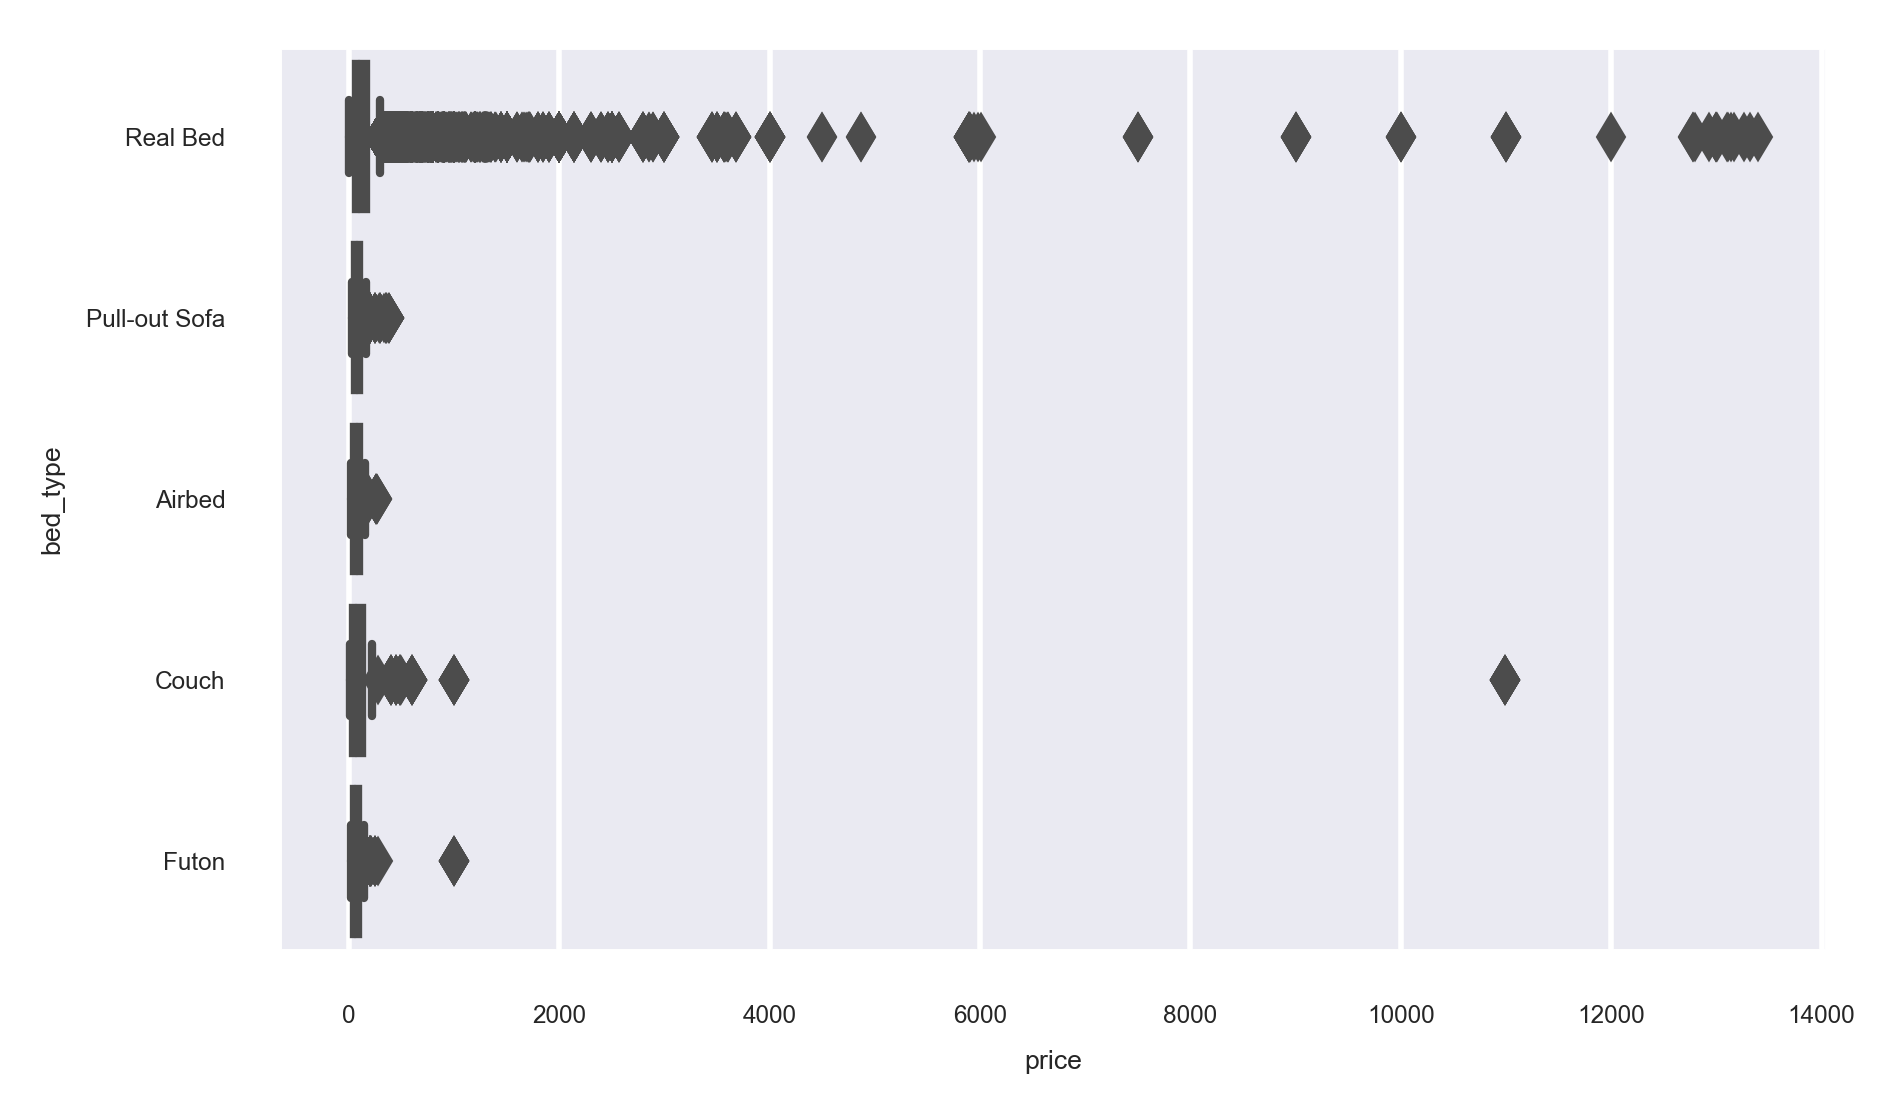

In [23]:
sort_order = master_df.groupby('bed_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
plt.figure(figsize=(5,3))
plt.rcParams.update({'font.size': 5})
sns.set(font_scale=0.4)
sns.boxplot(x='price', y='bed_type', data=master_df, order=sort_order)

Here we have one couch listing that seems suspicious. Yet we have some "Real Bed" listings that are even more suspicious.

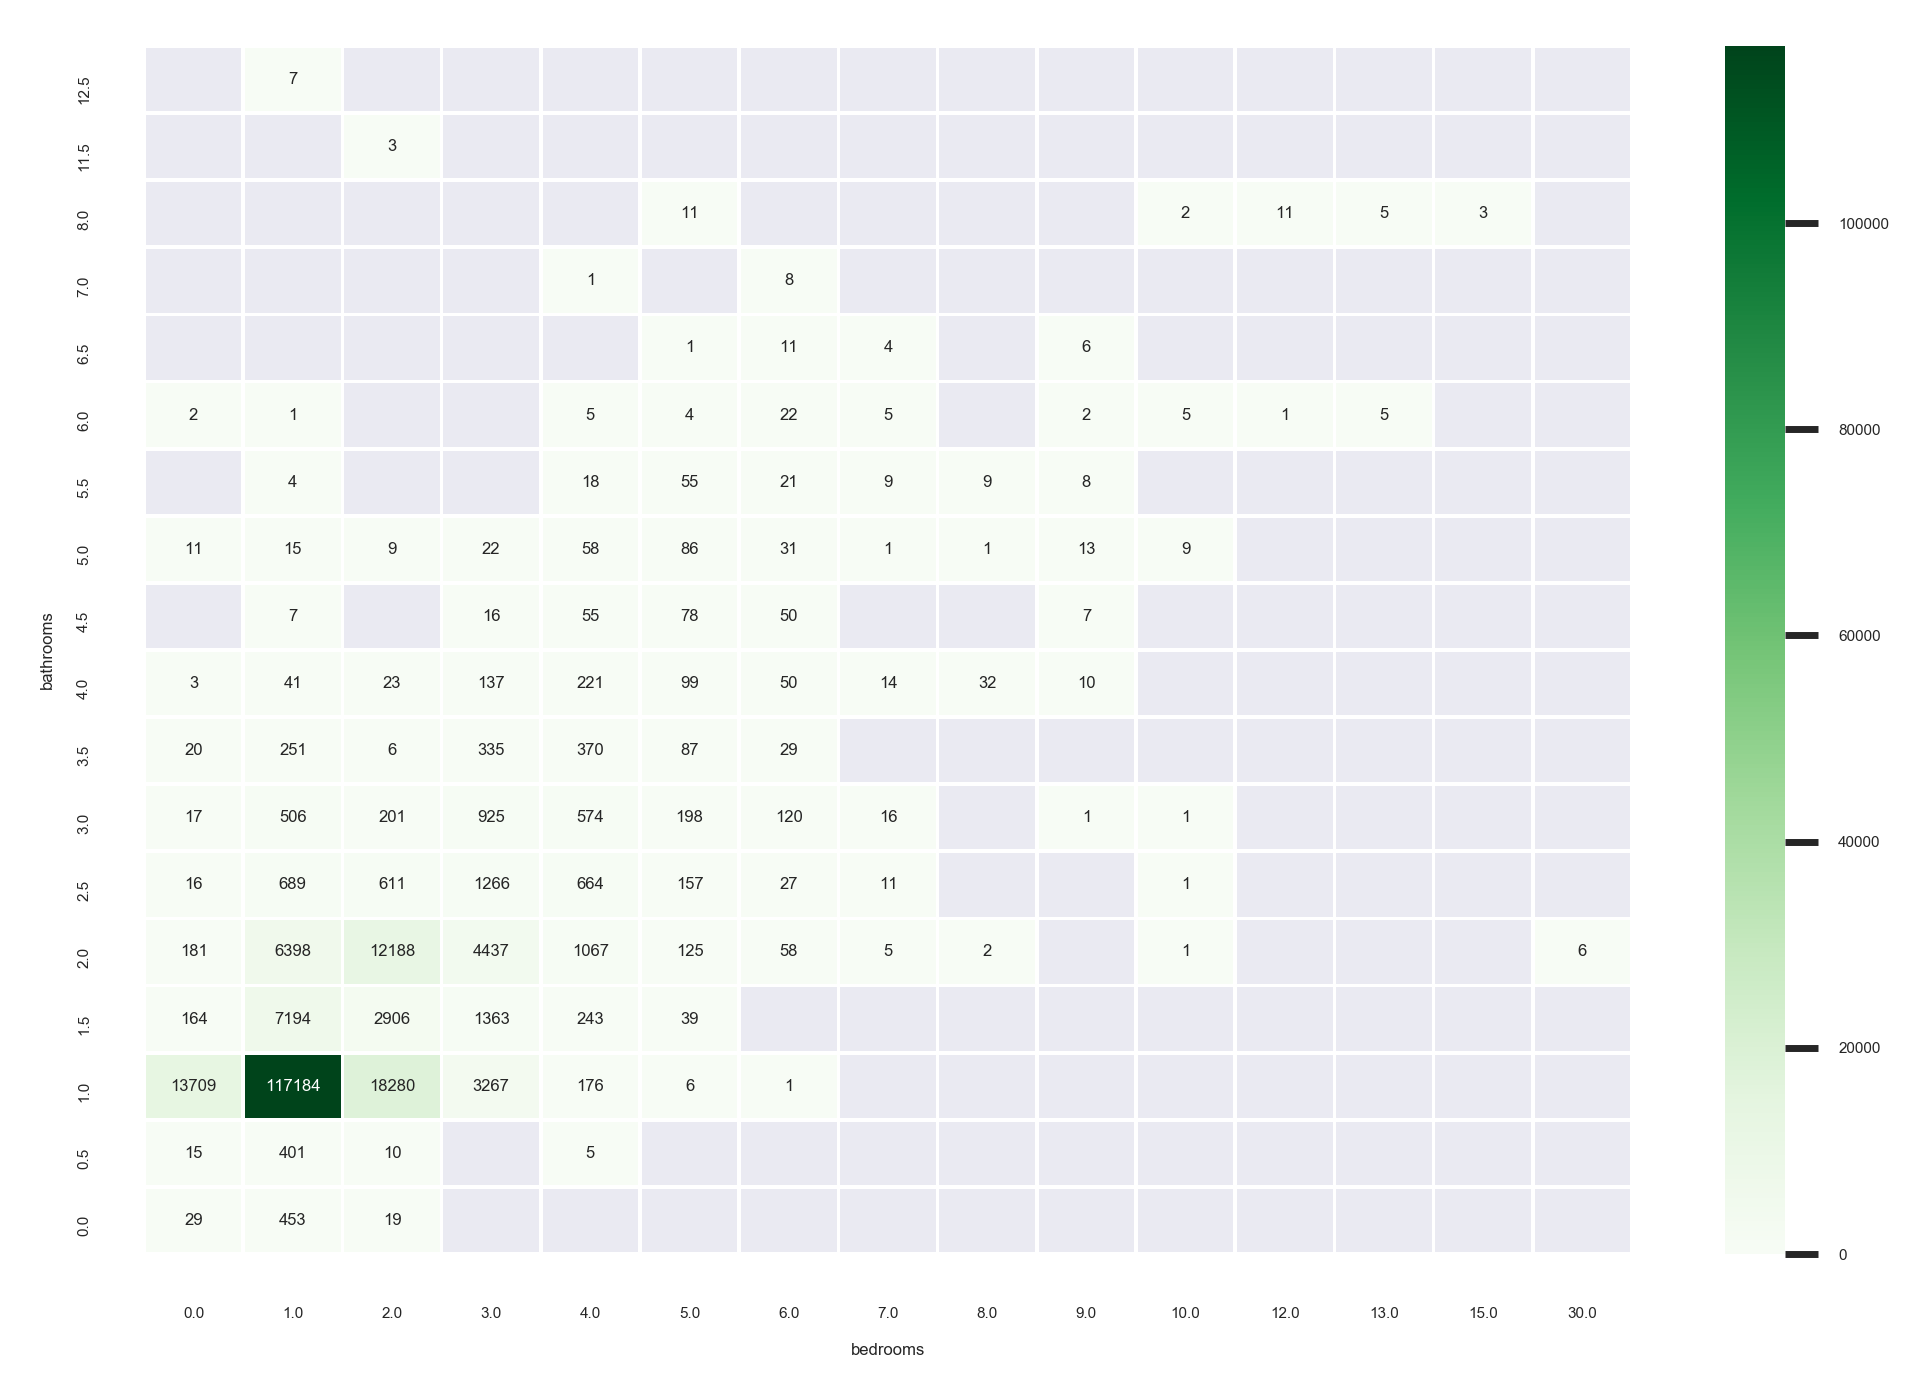

In [24]:
plt.rcParams.update({'font.size': 5})
sns.set(font_scale=0.25)
sns.heatmap(master_df.groupby(['bathrooms', 'bedrooms'])\
                .count()['price']\
                .reset_index()\
                .pivot('bathrooms', 'bedrooms', 'price')\
                .sort_index(ascending=False),
            cmap="Greens", fmt='.0f', annot=True, linewidths=0.5)

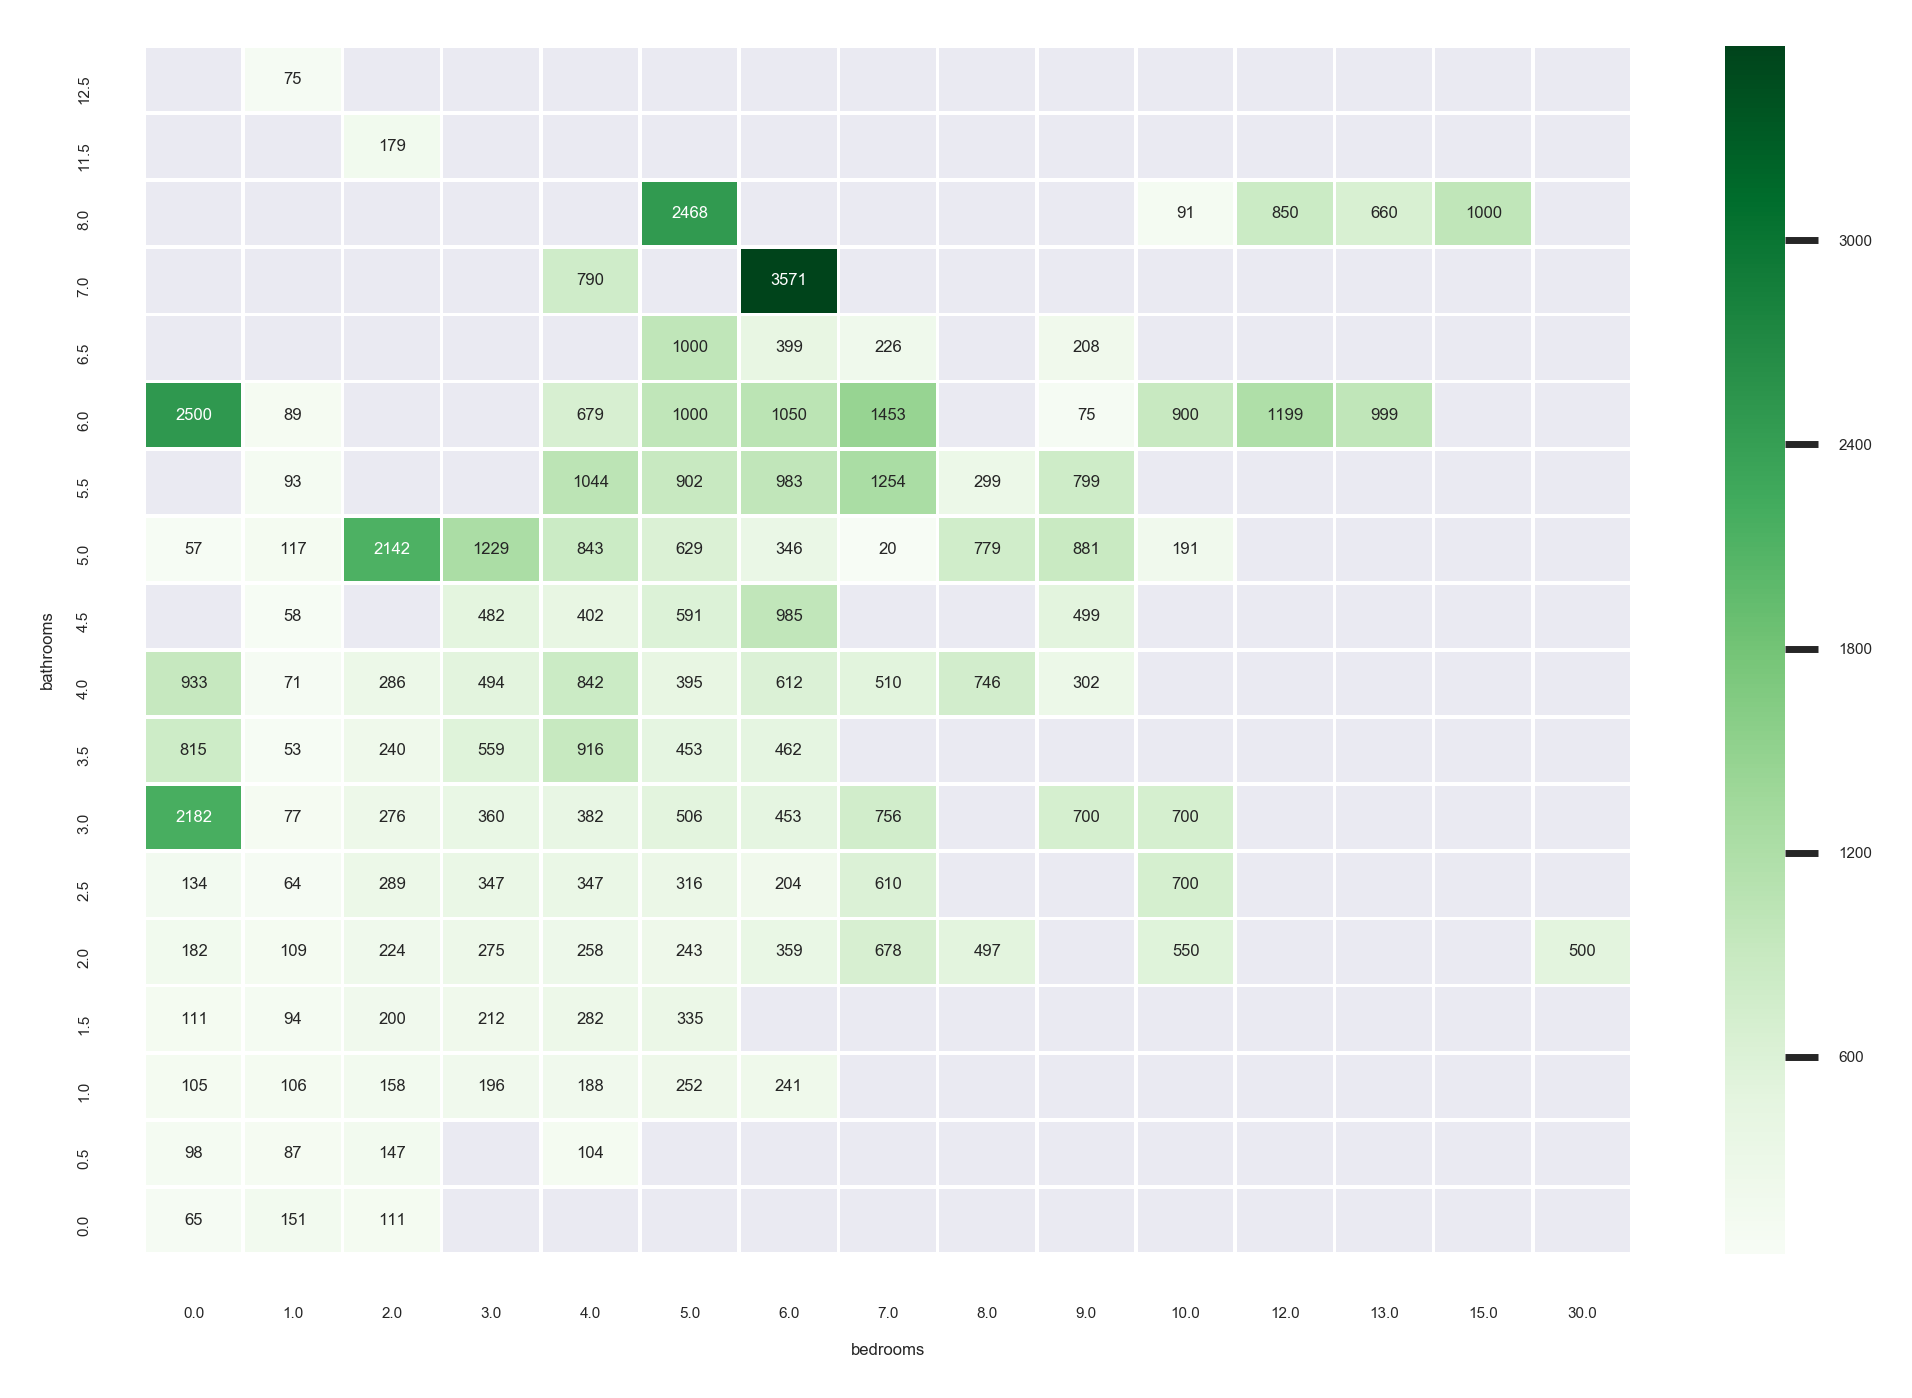

In [25]:
sns.heatmap(master_df.groupby(['bathrooms', 'bedrooms'])\
                .mean()['price']\
                .reset_index()\
                .pivot('bathrooms', 'bedrooms', 'price')\
                .sort_index(ascending=False),
            cmap="Greens", fmt='.0f', annot=True, linewidths=0.5)

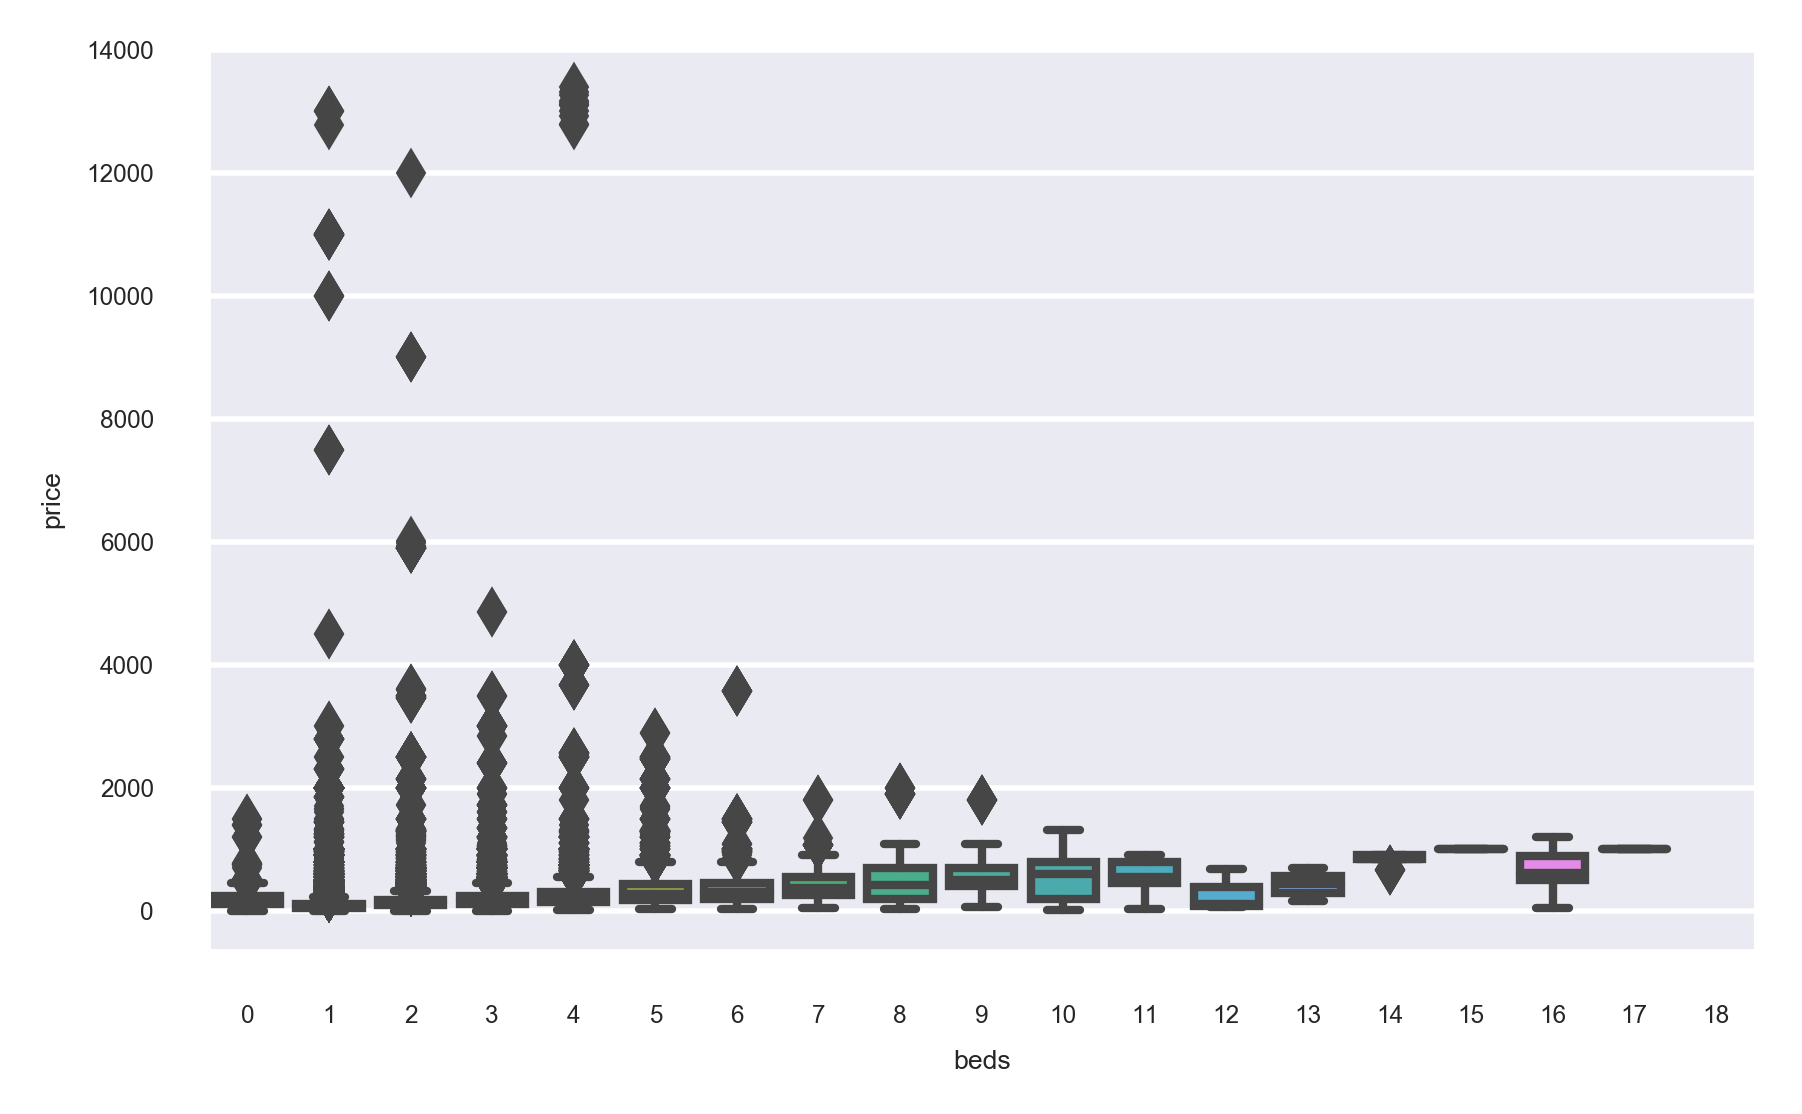

In [26]:
plt.figure(figsize=(5,3))
plt.rcParams.update({'font.size': 5})
sns.set(font_scale=0.4)
sns.boxplot(y='price', x='beds', data=master_df, order=range(0,19))

Here are the amenities that each BnB provides, sorted by the number of BnBs providing them:

In [ ]:
print(master_df.iloc[20036,:])

In [27]:
import folium
#master_df.reset_index(inplace=True)

myLat = 43.6823098050454
myLon = -79.3283423644293

city_map = folium.Map(location=[myLat,myLon], tiles="cartodbpositron", zoom_start=15)

for i in range(0,len(master_df)):
    if master_df.iloc[i]['price'] > 3000:
#        print(master_df.iloc[i]['price'])
        folium.Circle(
          location=[master_df.iloc[i]['latitude'], master_df.iloc[i]['longitude']],
          radius=master_df.iloc[i]['price']/400,
          popup=str(master_df.iloc[i]['price']) + ' ' + str(master_df.iloc[i]['host_id']) + ' ' + master_df.iloc[i]['host_name'] + ' ' + master_df.iloc[i]['property_type'],
          color='crimson',
          fill=True,
          fill_color='crimson'
           ).add_to(city_map)
    


city_map

A brief analysis of the above map reveals that very high prices are being charged mostly by condominiums. Very interesting, do we see some kind of money laundering scheme going on in some cases? Let's try to plot on a map any property that would be available more than 250 days each year. This might reveal either professional AirBnB hosts or, maybe, something else?

In [38]:
import folium
myLat = 43.6823098050454
myLon = -79.3283423644293

days_map1 = folium.Map(location=[myLat,myLon], tiles="cartodbpositron", zoom_start=15)
#count = 0
for i in range(0,len(master_df)):
    if master_df.iloc[i]['availability_365'] > 300 and master_df.iloc[i]['price'] > 1000:
#        count += 1

#        print(master_df.iloc[i]['price'])
        folium.Circle(
          location=[master_df.iloc[i]['latitude'], master_df.iloc[i]['longitude']],
          radius=master_df.iloc[i]['price']/400,
          popup=str(master_df.iloc[i]['price']) + ' ' + str(master_df.iloc[i]['host_id']) + ' ' + master_df.iloc[i]['host_name'] + ' ' + master_df.iloc[i]['property_type'] + ' ' + str(master_df.iloc[i]['availability_365']),
          color='crimson',
          fill=True,
          fill_color='crimson'
           ).add_to(days_map1)
    

#print(count)
days_map1

The plot above seems to point again to the fact that condominiums might be used for scams or something else that would be illegal. We are going to try and run an SVM on the data with the hope that we can detect outliers(https://www.kaggle.com/lrthtn/potential-outliers-detection).

In [39]:
from sklearn import svm
from sklearn.covariance import EllipticEnvelope


def displayResults(inliers, outliers, classifier, outputTitle):
    
    plt.figure()        
    
    # Defining grid
    gridX, gridY = np.meshgrid(np.linspace(-0.5, 1.5, 1000), np.linspace(-0.5, 1.5, 1000))
    
    # Computing decision for each point of the grid
    gridDecisions = classifier.decision_function(np.c_[gridX.ravel(), gridY.ravel()])
    
    # Plotting decision boundary (each point of the grid whose decision value is 0)
    gridDecisions = gridDecisions.reshape(gridX.shape)
    plotBoundary = plt.contour(gridX, gridY, gridDecisions, levels=[0], linewidths=2, colors='blue')
    plt.clabel(plotBoundary, inline=1, fontsize=12)

    # Plotting inliers and outliers
    plt.scatter(inliers.loc[:, 'accommodates'], inliers.loc[:, 'price'], label="Inliers", color='green', alpha=0.2)
    plt.scatter(outliers.loc[:, 'accommodates'], outliers.loc[:, 'price'], label="Outliers", color='red', alpha=1.0)
    
    plt.xlabel("Accomodates (normalized)")
    plt.ylabel("Price (normalized)")
    plt.title(outputTitle)
    plt.legend()    
    plt.show()
    
def getClassifierRobustCovariance(data):

    #------------------------------------------------------------------------------
    # Checking prerequisites
    #------------------------------------------------------------------------------

    numberOfSamples = data.shape[0]
    numberOfFeatures = data.shape[1]
    
    if (numberOfSamples > numberOfFeatures ** 2):
        
        #------------------------------------------------------------------------------
        # Preparing and fitting model
        #------------------------------------------------------------------------------
        
        # Initializing classifier
        classifier = EllipticEnvelope(contamination=0.001)
        
        # Fitting classifier
        classifier.fit(data)
        
        return classifier
       
    return None


def getClassifierOneClassSVM(data):

    #------------------------------------------------------------------------------
    # Preparing and fitting model
    #------------------------------------------------------------------------------    
    
    # Initializing classifier
    classifier = svm.OneClassSVM(nu=0.003, gamma=2.0)
    
    # Fitting classifier
    classifier.fit(data)
    
    return classifier

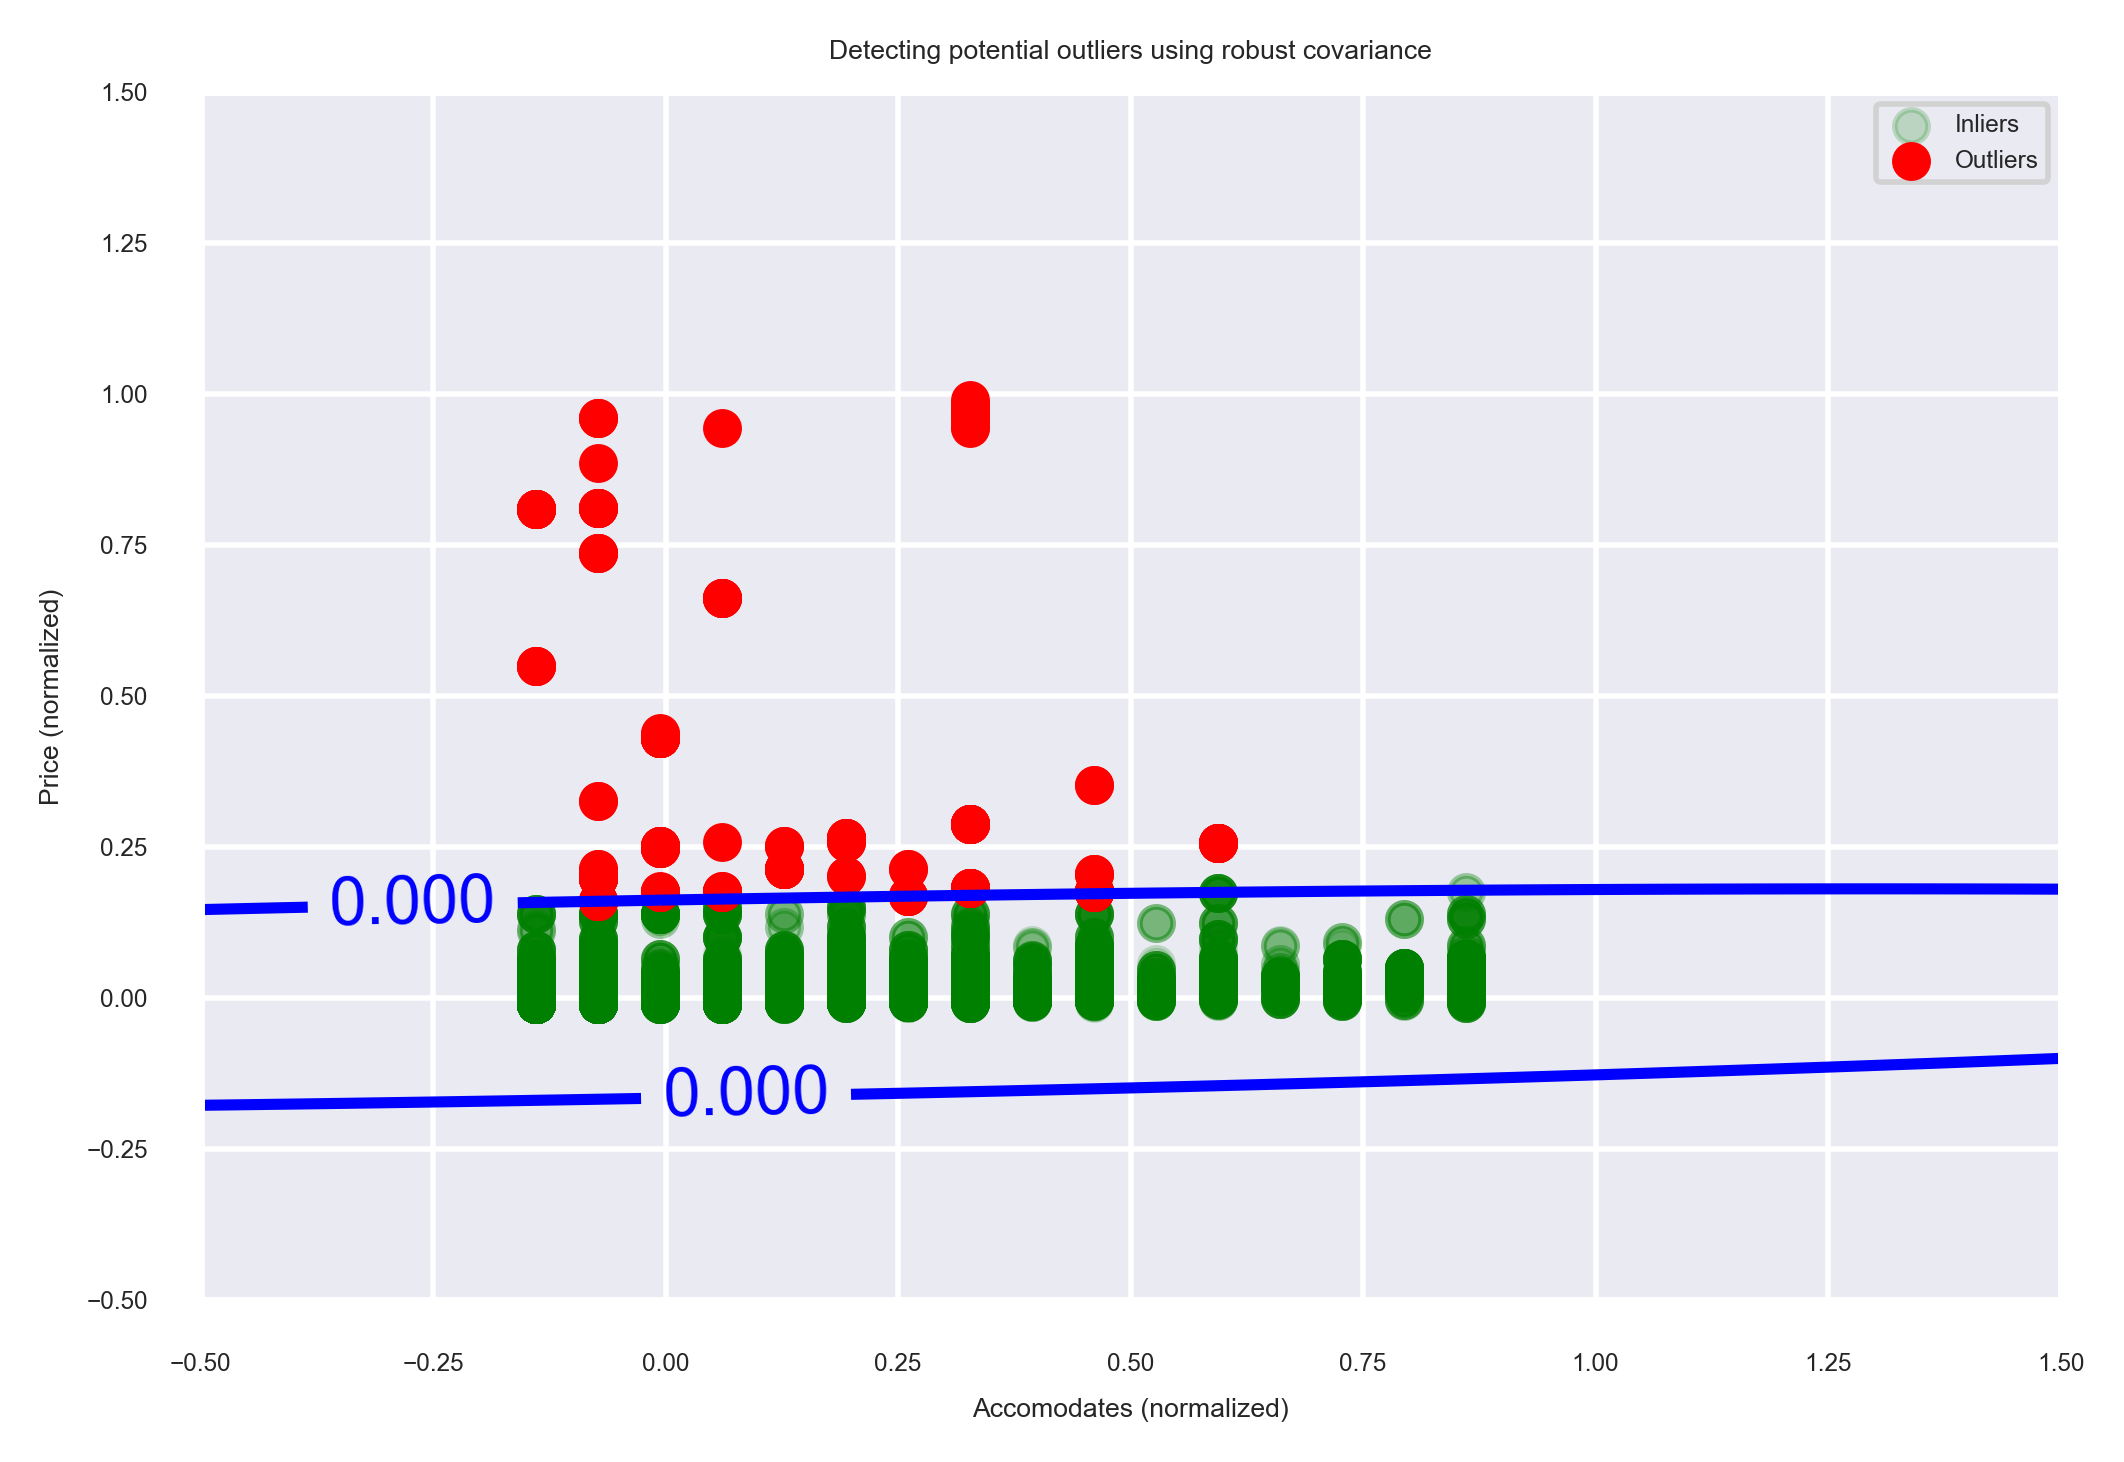

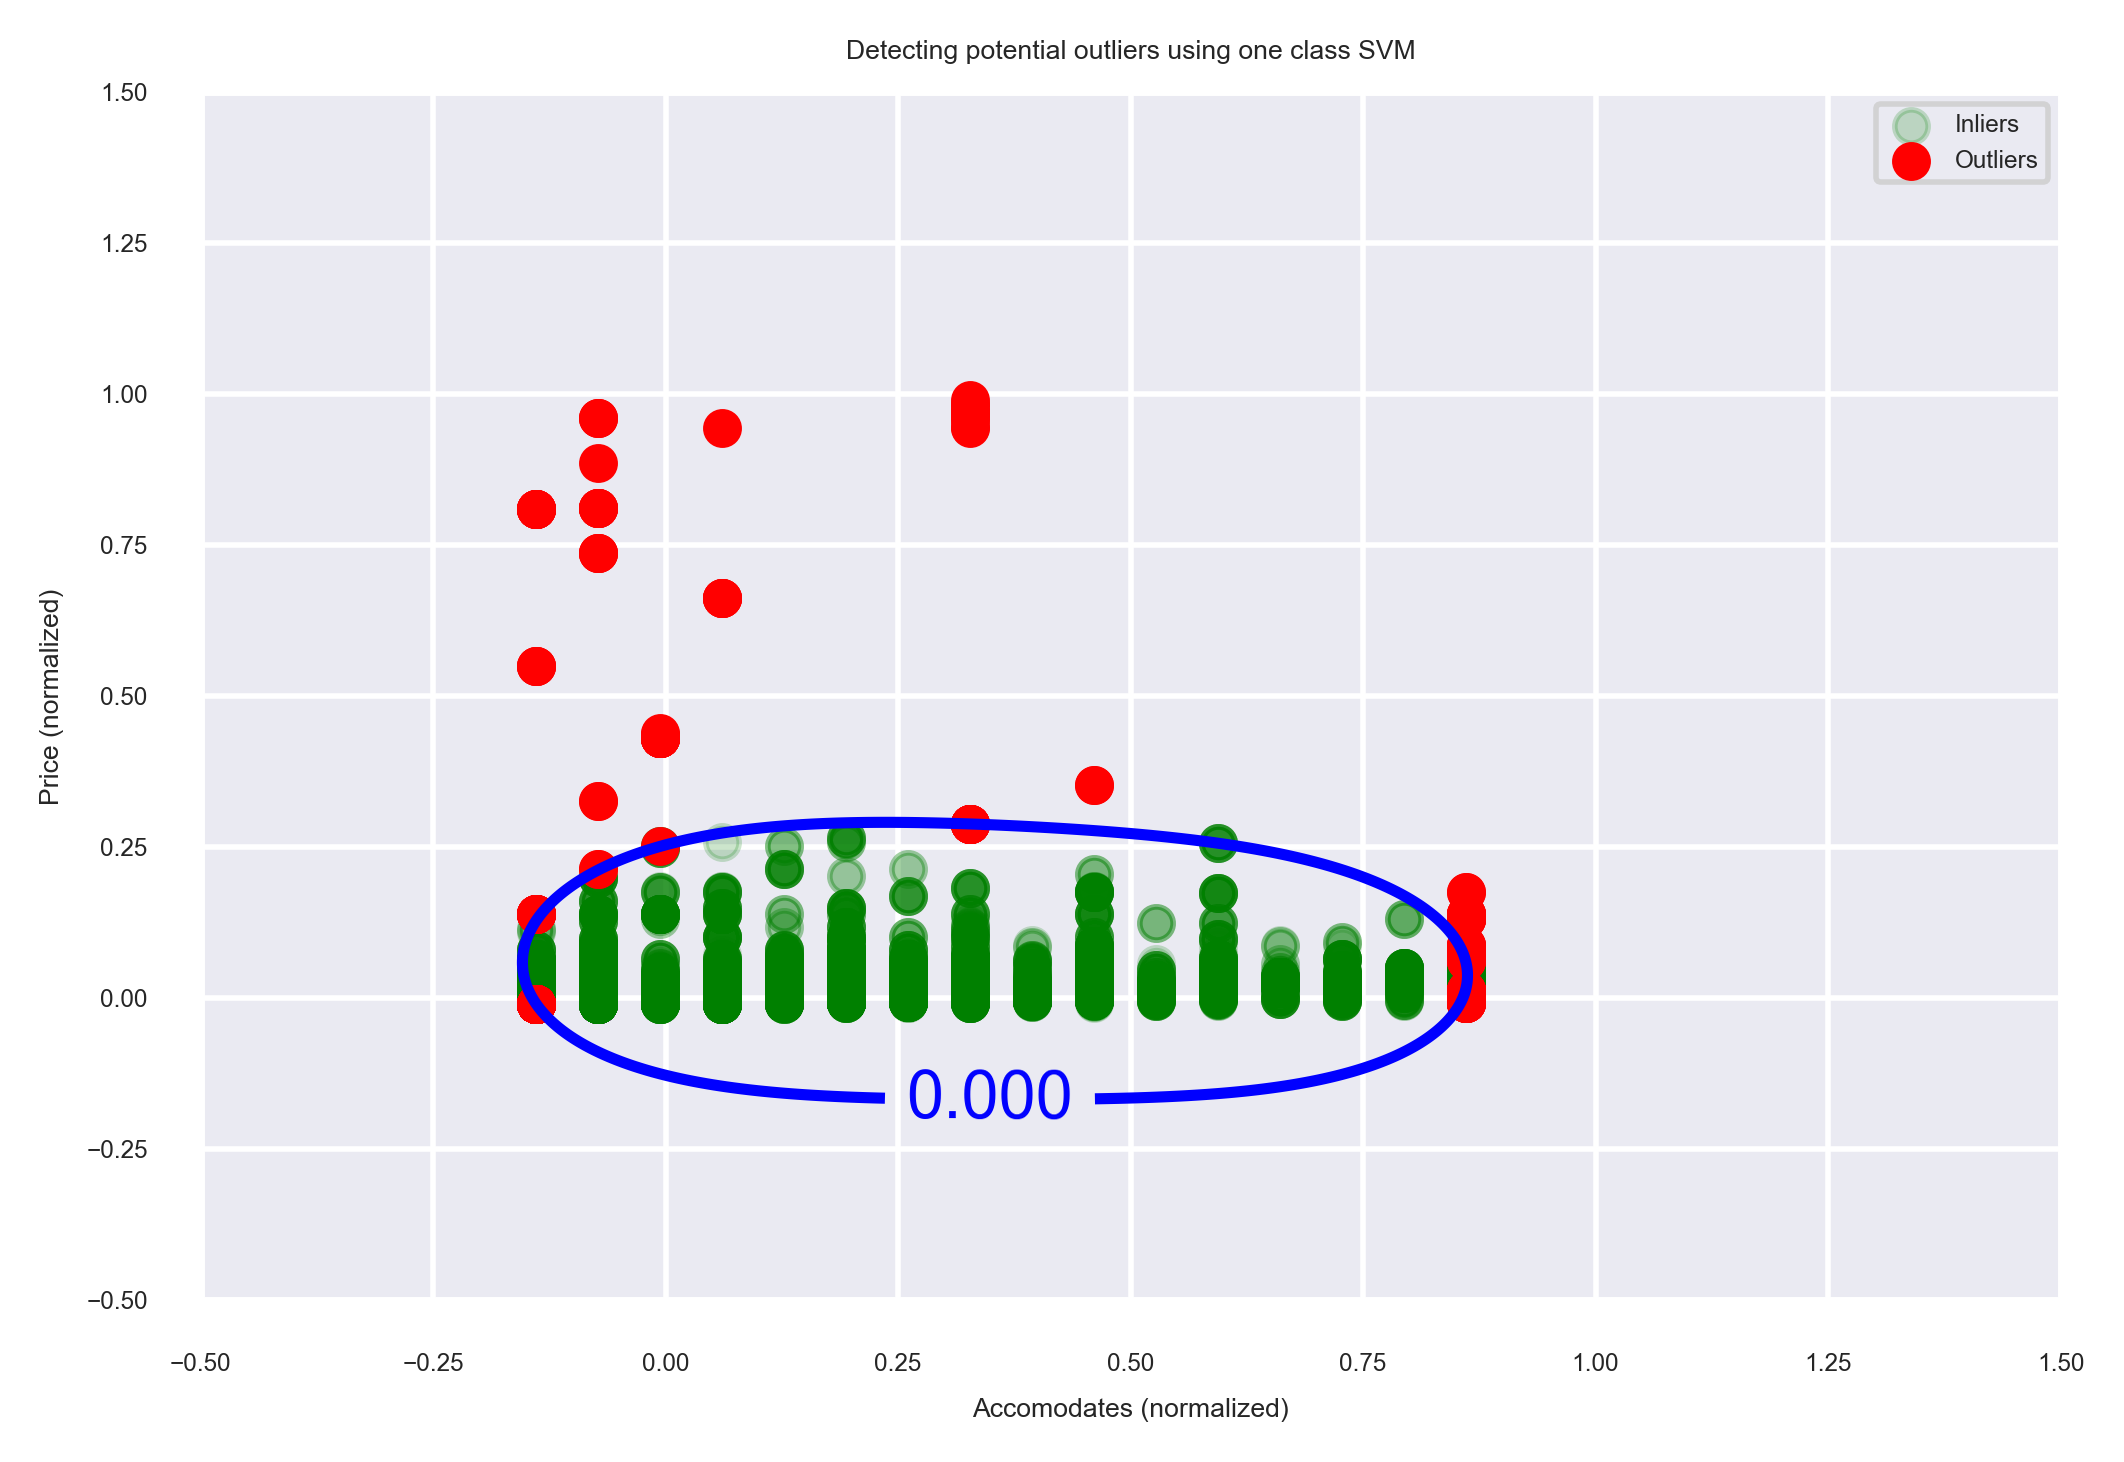

In [40]:


listings_features = master_df.loc[:, ['accommodates', 'price']]

# Fixing price column (removing unit, removing commas, converting to float)
#listings_features.loc[:, 'price'] = listings_features.loc[:, 'price'].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype(np.float)

# Normalizing features
listings_features = (listings_features - listings_features.mean()) / (listings_features.max() - listings_features.min())    

#------------------------------------------------------------------------------
# Detecting outliers with robust covariance
#------------------------------------------------------------------------------

# Getting classifier
classifierRobustCovariance = getClassifierRobustCovariance(listings_features)

# Classifying inliers/outliers
decisionsRobustCovariance = classifierRobustCovariance.decision_function(listings_features)

# Displaying results
displayResults(inliers=listings_features[decisionsRobustCovariance >= 0],
               outliers=listings_features[decisionsRobustCovariance < 0],
               classifier=classifierRobustCovariance,
               outputTitle = "Detecting potential outliers using robust covariance")

#------------------------------------------------------------------------------
# Detecting outliers with one class SVM
#------------------------------------------------------------------------------

# Getting classifier
classifierOneClassSVM = getClassifierOneClassSVM(listings_features)

# Classifying inliers/outliers
decisionsOneClassSVM = classifierOneClassSVM.decision_function(listings_features)

# Displaying results
displayResults(inliers=listings_features[decisionsOneClassSVM >= 0],
               outliers=listings_features[decisionsOneClassSVM < 0],
               classifier=classifierOneClassSVM,
               outputTitle = "Detecting potential outliers using one class SVM")

Interesting. We should probably try to understand the outliers in this data